<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/scripts/Cleaning_vaccine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS OF U.S COVID VACCINATION(2019 - 2022)

In [1]:
import pandas as pd

#open and read csv file
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/Vaccination-data-CDC.csv"
df = pd.read_csv(url)
df.head(5)


,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
0,05/10/2023,Report,19,CO,15097,13033446,NaN,1527,4837792,NaN,84.0,NaN,1218,4248431,73.8,1569,2460212,57.9,9725,1272115
1,05/10/2023,Report,19,AZ,16505,14647405,NaN,2955,5704677,NaN,78.4,NaN,1101,4821350,66.2,1401,2418342,50.2,11388,1148060
2,05/10/2023,Report,19,MN,16020,12829141,NaN,1282,4461994,NaN,79.1,NaN,932,4082263,72.4,1698,2595884,63.6,5497,1510743
3,05/10/2023,Report,19,ID,3526,2894361,NaN,323,1146055,NaN,64.1,NaN,267,1012257,56.6,333,494214,48.8,2032,248989
4,05/10/2023,Report,19,DC,31,2137377,NaN,264,836680,NaN,95.0,NaN,212,644085,91.3,196,330888,51.4,509,226857


In [2]:
#drop column Code, since it is not relevant
df = df.drop(columns=['Administered_7_Day_Rolling_Average', 'Admin_Dose_1_Day_Rolling_Average',
                      'Administered_daily_change_report', 'Series_Complete_Pop_Pct', 'MMWR_week'])


In [3]:
df.head(5)

,Date,date_type,Location,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
0,05/10/2023,Report,CO,15097,13033446,1527,4837792,84.0,1218,4248431,1569,2460212,57.9,9725,1272115
1,05/10/2023,Report,AZ,16505,14647405,2955,5704677,78.4,1101,4821350,1401,2418342,50.2,11388,1148060
2,05/10/2023,Report,MN,16020,12829141,1282,4461994,79.1,932,4082263,1698,2595884,63.6,5497,1510743
3,05/10/2023,Report,ID,3526,2894361,323,1146055,64.1,267,1012257,333,494214,48.8,2032,248989
4,05/10/2023,Report,DC,31,2137377,264,836680,95.0,212,644085,196,330888,51.4,509,226857


In [4]:
#filter data to exclude data per state, and only include total national data for each day
df_filtered = df[(df['Location'] == 'US') & (df['date_type'] == 'Admin')]
df_filtered.head(5)

,Date,date_type,Location,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
109,05/09/2023,Admin,US,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510
175,05/08/2023,Admin,US,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527
180,05/07/2023,Admin,US,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698
248,05/06/2023,Admin,US,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562
357,05/05/2023,Admin,US,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289


In [5]:
df_filtered = df_filtered.drop(columns=['Location', 'date_type'])
df_filtered.head(5)

,Date,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
109,05/09/2023,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510
175,05/08/2023,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527
180,05/07/2023,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698
248,05/06/2023,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562
357,05/05/2023,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289


In [6]:
df_filtered.isna().sum()

,0
Date,0
Administered_Daily,0
Administered_Cumulative,0
Admin_Dose_1_Daily,0
Admin_Dose_1_Cumulative,0
Administered_Dose1_Pop_Pct,0
Series_Complete_Daily,0
Series_Complete_Cumulative,0
Booster_Daily,0
Booster_Cumulative,0


In [7]:
# What is the range of Day variable?
print(df_filtered['Date'].max())
print(df_filtered['Date'].min())

12/31/2022
01/01/2021


In [8]:
# Convert Day to Date Time
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Year'] = df_filtered['Date'].dt.year


In [9]:

# Extract the week number
df_filtered['Week'] = df_filtered['Date'].dt.isocalendar().week
df_filtered.head(5)

,Date,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative,Year,Week
109,2023-05-09,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510,2023,19
175,2023-05-08,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527,2023,19
180,2023-05-07,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698,2023,18
248,2023-05-06,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562,2023,18
357,2023-05-05,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289,2023,18


In [10]:
df_filtered['Date'].dtypes

dtype('<M8[ns]')

In [11]:
print(df_filtered.columns)


Index(['Date', 'Administered_Daily', 'Administered_Cumulative',
       'Admin_Dose_1_Daily', 'Admin_Dose_1_Cumulative',
       'Administered_Dose1_Pop_Pct', 'Series_Complete_Daily',
       'Series_Complete_Cumulative', 'Booster_Daily', 'Booster_Cumulative',
       'Additional_Doses_Vax_Pct', 'Bivalent_Booster_Daily',
       'Bivalent_Booster_Cumulative', 'Year', 'Week'],
      dtype='object')


In [12]:
df_filtered.sort_values('Date', inplace=True)

weekly_data = df_filtered.resample('W-SAT', on='Date', origin='2019-12-29').sum()

weekly_summary = pd.DataFrame({
    'Start_Date': weekly_data.index - pd.to_timedelta(6, unit='d'),
    'End_Date': weekly_data.index,
    'Total_Doses': weekly_data['Administered_Daily'],
})

weekly_summary.reset_index(drop=True, inplace=True)

print(weekly_summary)

    Start_Date   End_Date  Total_Doses
0   2020-12-13 2020-12-19      1139003
1   2020-12-20 2020-12-26      1878155
2   2020-12-27 2021-01-02      3105966
3   2021-01-03 2021-01-09      5613572
4   2021-01-10 2021-01-16      7179128
..         ...        ...          ...
121 2023-04-09 2023-04-15       269637
122 2023-04-16 2023-04-22       321440
123 2023-04-23 2023-04-29       510107
124 2023-04-30 2023-05-06       556484
125 2023-05-07 2023-05-13        88771

[126 rows x 3 columns]


In [13]:
weekly_summary.head(25)

,Start_Date,End_Date,Total_Doses
0,2020-12-13,2020-12-19,1139003
1,2020-12-20,2020-12-26,1878155
2,2020-12-27,2021-01-02,3105966
3,2021-01-03,2021-01-09,5613572
4,2021-01-10,2021-01-16,7179128
5,2021-01-17,2021-01-23,8371239
6,2021-01-24,2021-01-30,10315441
7,2021-01-31,2021-02-06,11781298
8,2021-02-07,2021-02-13,12835915
9,2021-02-14,2021-02-20,10537483


In [14]:
weekly_summary['Week'] = weekly_summary['End_Date'].dt.isocalendar().week
weekly_summary['Week']= weekly_summary['Week'].astype(float)

In [15]:
weekly_summary

,Start_Date,End_Date,Total_Doses,Week
0,2020-12-13,2020-12-19,1139003,51.0
1,2020-12-20,2020-12-26,1878155,52.0
2,2020-12-27,2021-01-02,3105966,53.0
3,2021-01-03,2021-01-09,5613572,1.0
4,2021-01-10,2021-01-16,7179128,2.0
...,...,...,...,...
121,2023-04-09,2023-04-15,269637,15.0
122,2023-04-16,2023-04-22,321440,16.0
123,2023-04-23,2023-04-29,510107,17.0
124,2023-04-30,2023-05-06,556484,18.0


In [16]:
weekly_summary.to_csv('clean_vaccine_data.csv')

In [17]:
# Filter by year and sort values by week
df_2020= df_filtered[df_filtered['Year']== '2020'].sort_values('Week')
df_2021= df_filtered[df_filtered['Year']== '2021'].sort_values('Week')
df_2022= df_filtered[df_filtered['Year']== '2022'].sort_values('Week')

In [18]:
import matplotlib.pyplot as plt

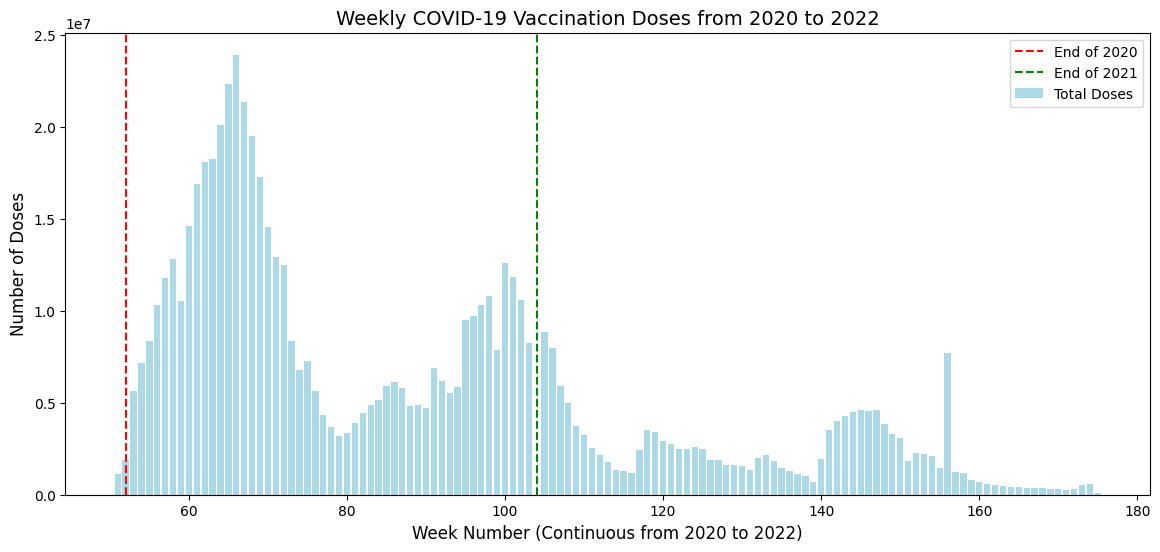

In [19]:
plt.figure(figsize=(14, 6))

# Bar plot for all years with continuous week numbering
plt.bar(weekly_summary['Week'] + (weekly_summary['End_Date'].dt.year - 2020) * 52,
        weekly_summary['Total_Doses'], color='lightblue', label='Total Doses')

# Add vertical lines to mark the end of each year
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title("Weekly COVID-19 Vaccination Doses from 2020 to 2022", fontsize=14)
plt.xlabel("Week Number (Continuous from 2020 to 2022)", fontsize=12)
plt.ylabel("Number of Doses", fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.show()

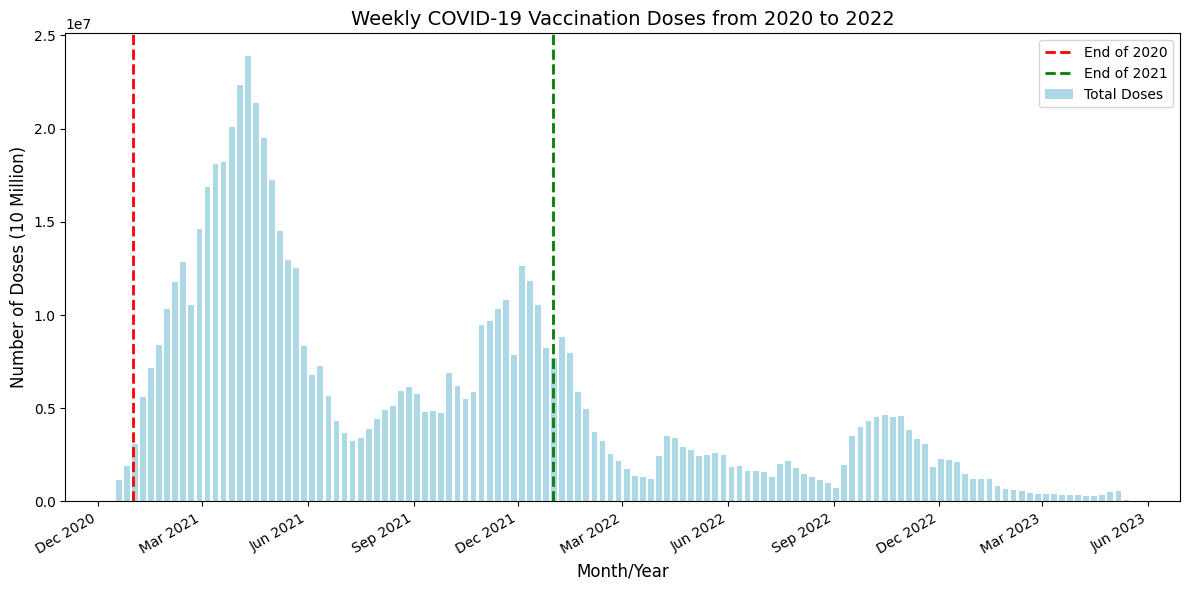

In [20]:
import matplotlib.dates as mdates

weekly_summary['Date'] = pd.to_datetime(weekly_summary['End_Date'])

plt.figure(figsize=(12, 6))
plt.bar(weekly_summary['Date'],
        weekly_summary['Total_Doses'], color='lightblue', label='Total Doses', width=5)

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='red', linestyle='--', linewidth=2, label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', linewidth=2, label='End of 2021')

# Add titles and labels
plt.title("Weekly COVID-19 Vaccination Doses from 2020 to 2022", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("Number of Doses (10 Million)", fontsize=12)

# Format the x-axis to show every three months (quarterly)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set major ticks to every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks to show month and year

plt.gcf().autofmt_xdate()

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



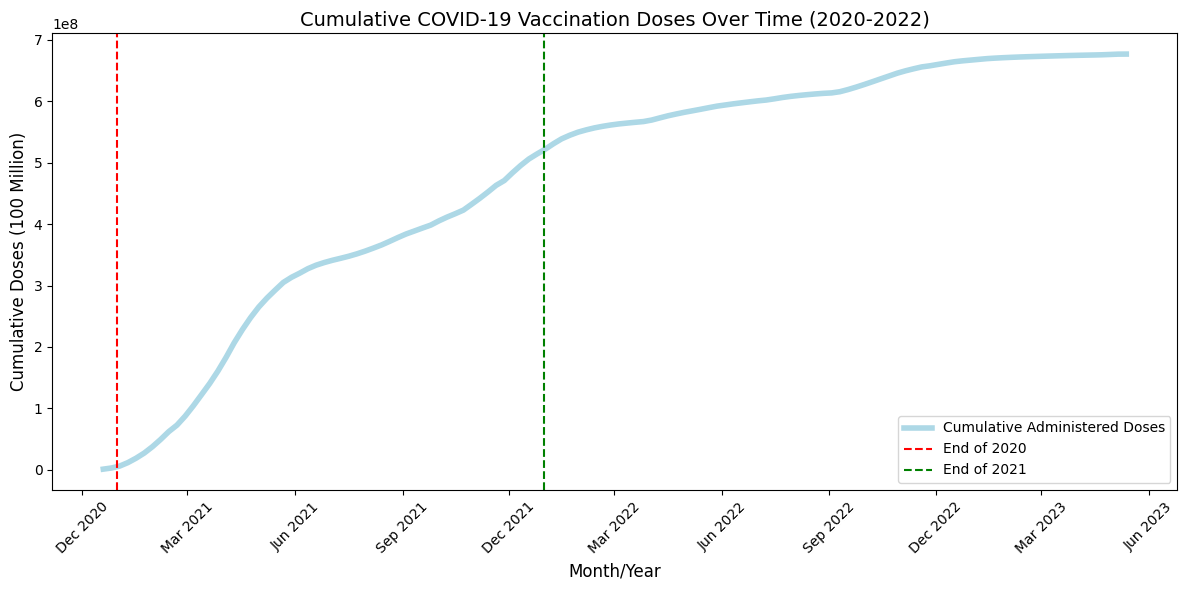

In [21]:
#Line graph of cummulative doses overtime
# Add a new column 'doses_cumulative' that represents the cumulative sum of doses
weekly_summary['doses_cumulative'] = weekly_summary['Total_Doses'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['End_Date'], weekly_summary['doses_cumulative'],
         color='lightblue', linewidth=4, label='Cumulative Administered Doses')

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='red', linestyle='--', label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', label='End of 2021')

# Set the x-axis to display every three months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add titles and labels
plt.title("Cumulative COVID-19 Vaccination Doses Over Time (2020-2022)", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("Cumulative Doses (100 Million)", fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
